In [1]:
import pandas as pd
import pynbody 
import numpy as np 
import tangos

import scipy.stats as ss

import sys
sys.path.insert(0, '../util/')
from util import util

import matplotlib.pyplot as plt

### Quantities for each galaxy
* w20 (our HI profile)
* Mbar (pynbody)
* Mstar (pynbody)
* MHI (pynbody)
* SFR (tangos?)
* SFR/MHI (can try SFE but may not be accurate for dwarfs) (pynbody)
* $\langle \Sigma_{SFR} \rangle$
* $\langle \Sigma_{HI} \rangle$ 
* $\langle \Sigma_{baryon} \rangle$

Also, spearman rank correlation coefficient for each pair 

$\Sigma_{SFR} = (8.1\times 10^{-2}I_{FUV} + 3.2 \times 10^{-3}I_{24}) \cos i$

In [2]:
# load data 
df = pd.read_csv('/home/jw1624/H1-merian/csvs/cornerPlotVals.txt')

In [3]:
df

,Galaxy,w20,Mbar_t,Mstar_t,Mgas_t,Mbar_z,Mstar_z,Mgas_z,SFR,Rvir
0,431,156.8,7.180000e+09,795000000.0,6.390000e+09,2.260000e+10,1.490000e+09,2.110000e+10,0.009294,153.54
1,468,134.4,7.460000e+09,405000000.0,7.060000e+09,2.050000e+10,2.050000e+09,1.840000e+10,0.017400,143.53
2,492,123.2,5.550000e+09,880000000.0,4.670000e+09,1.660000e+10,1.190000e+09,1.550000e+10,0.002985,143.91
3,502,134.4,6.550000e+09,144000000.0,6.410000e+09,2.180000e+10,1.430000e+09,2.040000e+10,0.000000,146.87
4,523,100.8,4.570000e+09,837000000.0,3.730000e+09,1.730000e+10,5.340000e+08,1.680000e+10,0.017619,137.33
5,569,89.6,4.480000e+09,401000000.0,4.080000e+09,1.910000e+10,4.770000e+08,1.860000e+10,0.022976,129.41
6,597,123.2,4.620000e+09,705000000.0,3.910000e+09,1.320000e+10,6.510000e+08,1.250000e+10,0.000000,128.56
7,615,201.6,5.050000e+09,259000000.0,4.790000e+09,3.380000e+10,2.990000e+09,3.080000e+10,0.007646,186.82


<ipython-input-6-15846756a3cc>:90: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[6,0].set_ylim(top=max(y)*2, bottom=min(y)/1.2)


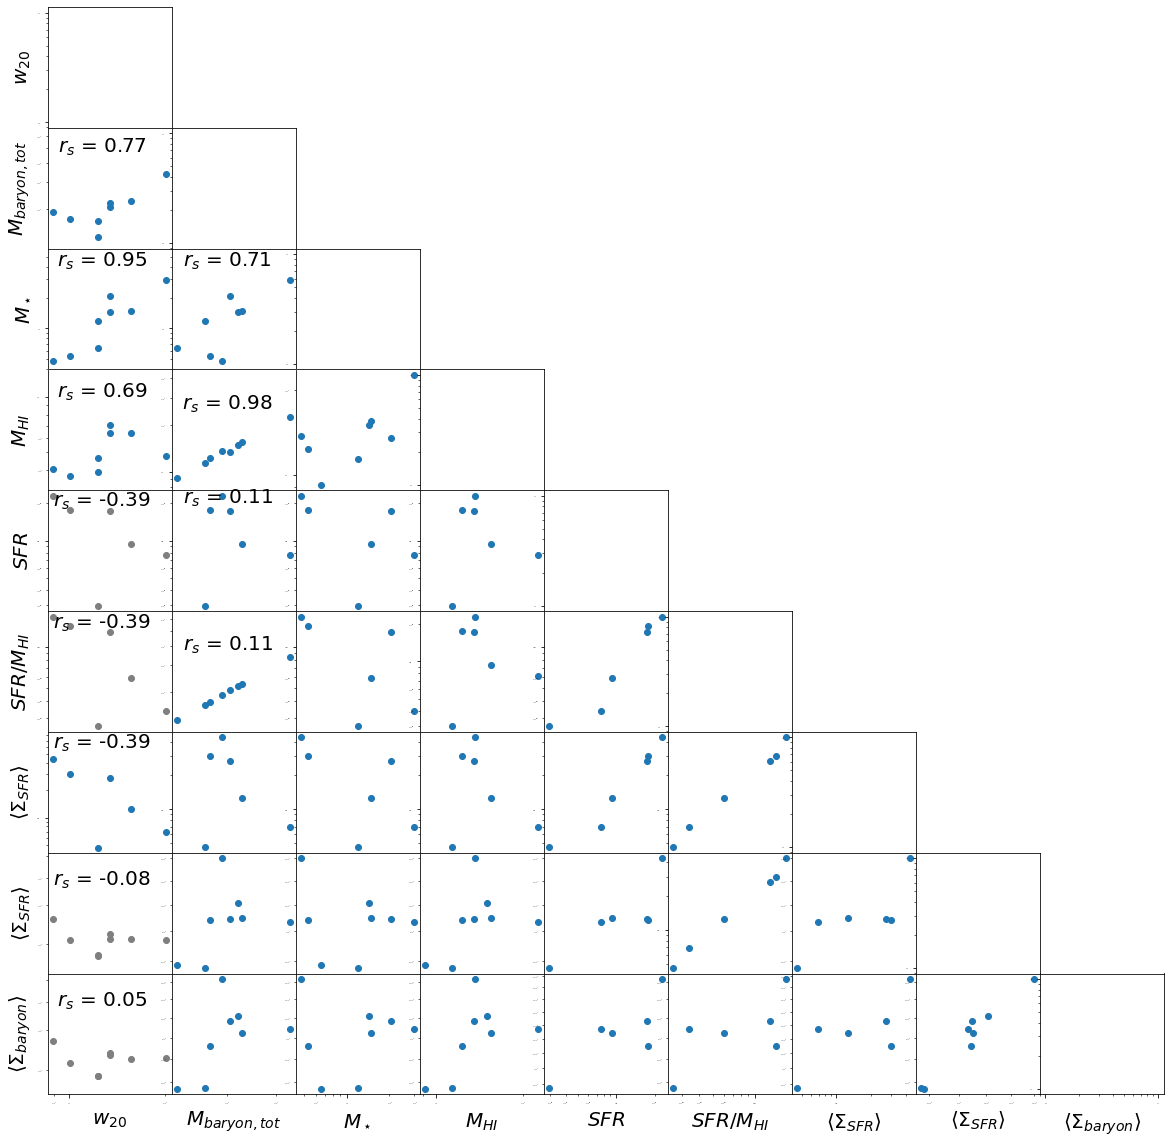

In [6]:
# uses tangos masses when true, zoom/pynbody when false
useTangos = False

fig, axs = plt.subplots(9,9, facecolor='w', figsize=(20,20), sharex=False, sharey=False)

# turn off unneeded subplots & set log scaling
for i in range(9):
    for j in range(9):
        if j>i:
            axs[i,j].axis('off')
        else:
            axs[i,j].set_xscale('log')
            axs[i,j].set_yscale('log')
            axs[i,j].tick_params(axis='both', which='major', labelsize=0.001)
            axs[i,j].tick_params(axis='both', which='minor', labelsize=0.001)

## --- FIRST COLUMN --- 
# w20 and Mbar
x = df['w20']
y = df['Mbar_z']
x = x[y>0]
y = y[y>0]
if useTangos: y = df['Mbar_t']

rs = ss.spearmanr(x,y)[0]
axs[1,0].set_ylim(top=2*max(y), bottom=min(y)/1.2)
axs[1,0].text(x=min(x)+(max(x)-min(x))/3, y=max(y)*1.5, s=r'$r_s$ = %.2f'%rs, fontsize=20, zorder=10, 
            horizontalalignment='center', verticalalignment='center')

c = 'tab:blue'
if rs < 0.53: c = 'tab:gray'
axs[1,0].scatter(x,y, c=c)

# w20 and Mstar
x = df['w20']
y = df['Mstar_z']
x = x[y>0]
y = y[y>0]
if useTangos: y = df['Mstar_t']

rs = ss.spearmanr(x,y)[0]
axs[2,0].set_ylim(top=max(y)*2, bottom=min(y)/1.2)
axs[2,0].text(x=min(x)+(max(x)-min(x))/3, y=max(y)*1.5, s=r'$r_s$ = %.2f'%rs, fontsize=20, zorder=10, 
            horizontalalignment='center', verticalalignment='center')

c = 'tab:blue'
if rs < 0.53: c = 'tab:gray'
axs[2,0].scatter(x,y, c=c)

# w20 and MHI 
x = df['w20']
y = df['Mgas_t']
x = x[y>0]
y = y[y>0]
if useTangos: y = df['Mgas_z']

rs = ss.spearmanr(x,y)[0]
axs[3,0].set_ylim(top=max(y)*2, bottom=min(y)/1.2)
axs[3,0].text(x=min(x)+(max(x)-min(x))/3, y=max(y)*1.5, s=r'$r_s$ = %.2f'%rs, fontsize=20, zorder=10, 
            horizontalalignment='center', verticalalignment='center')

c = 'tab:blue'
if rs < 0.53: c = 'tab:gray'
axs[3,0].scatter(x,y, c=c)

# w20 and SFR 
x = df['w20']
y = df['SFR']
x = x[y>0]
y = y[y>0]

rs = ss.spearmanr(x,y)[0]
axs[4,0].set_ylim(top=max(y)*2, bottom=min(y)/1.2)
axs[4,0].text(x=min(x)+(max(x)-min(x))/3, y=max(y)*1.5, s=r'$r_s$ = %.2f'%rs, fontsize=20, zorder=10, 
            horizontalalignment='center', verticalalignment='center')

c = 'tab:blue'
if rs < 0.53: c = 'tab:gray'
axs[4,0].scatter(x,y, c=c)

# w20 and SFR/MHI
x = df['w20']
y = df['SFR']/(df['Mgas_z']/1.36)
x = x[y>0]
y = y[y>0]
if useTangos: y = df['SFR']/(df['Mgas_t']/1.36)

rs = ss.spearmanr(x,y)[0]
axs[5,0].set_ylim(top=max(y)*2, bottom=min(y)/1.2)
axs[5,0].text(x=min(x)+(max(x)-min(x))/3, y=max(y)*1.5, s=r'$r_s$ = %.2f'%rs, fontsize=20, zorder=10, 
            horizontalalignment='center', verticalalignment='center')

c = 'tab:blue'
if rs < 0.53: c = 'tab:gray'
axs[5,0].scatter(x,y, c=c)

# w20 and Sigma_SFR 
x = df['w20']
y = df['SFR']/(3.14*(df['Rvir']**2))
x = x[y>0]
y = y[y>0]

axs[6,0].scatter(x,y)
rs = ss.spearmanr(x,y)[0]
axs[6,0].set_ylim(top=max(y)*2, bottom=min(y)/1.2)
axs[6,0].text(x=min(x)+(max(x)-min(x))/3, y=max(y)*1.5, s=r'$r_s$ = %.2f'%rs, fontsize=20, zorder=10, 
            horizontalalignment='center', verticalalignment='center')

# w20 and Sigma HI
x = df['w20']
y = (df['Mgas_z']/1.36)/(3.14*(df['Rvir']**2))
if useTangos: y = (df['Mgas_t']/1.36)/(3.14*(df['Rvir']**2))

rs = ss.spearmanr(x,y)[0]
axs[7,0].set_ylim(top=max(y)*2, bottom=min(y)/1.2)
axs[7,0].text(x=min(x)+(max(x)-min(x))/3, y=max(y)*1.5, s=r'$r_s$ = %.2f'%rs, fontsize=20, zorder=10, 
            horizontalalignment='center', verticalalignment='center')

c = 'tab:blue'
if rs < 0.53: c = 'tab:gray'
axs[7,0].scatter(x,y, c=c)

# w20 and Sigma Baryon
y = (df['Mbar_z']/1.36)/(3.14*(df['Rvir']**2))
if useTangos: y = (df['Mbar_t']/1.36)/(3.14*(df['Rvir']**2))

rs = ss.spearmanr(x,y)[0]
axs[8,0].set_ylim(top=max(y)*2, bottom=min(y)/1.2)
axs[8,0].text(x=min(x)+(max(x)-min(x))/3, y=max(y)*1.5, s=r'$r_s$ = %.2f'%rs, fontsize=20, zorder=10, 
            horizontalalignment='center', verticalalignment='center')

c = 'tab:blue'
if rs < 0.53: c = 'tab:gray'
axs[8,0].scatter(x,y, c=c)

## 

## --- SECOND COLUMN --- 
x = df['Mbar_z']
if useTangos: x = df['Mbar_t']

# Mbaryon,tot and Mstar
y = df['Mstar_z']
if useTangos: y = df['Mstar_t']

rs = ss.spearmanr(x,y)[0]
axs[2,1].set_ylim(top=max(y)*2, bottom=min(y)/1.2)
axs[2,1].text(x=min(x)+(max(x)-min(x))/3, y=max(y)*1.5, s=r'$r_s$ = %.2f'%rs, fontsize=20, zorder=10, 
            horizontalalignment='center', verticalalignment='center')

c = 'tab:blue'
if rs < 0.53: c = 'tab:gray'
axs[2,1].scatter(x,y)

# Mbaryon,tot and MHI
y = df['Mgas_z']/1.36
if useTangos: y = df['Mgas_t']/1.36

rs = ss.spearmanr(x,y)[0]
axs[3,1].set_ylim(top=max(y)*2, bottom=min(y)/1.2)
axs[3,1].text(x=min(x)+(max(x)-min(x))/3, y=max(y)*1.2, s=r'$r_s$ = %.2f'%rs, fontsize=20, zorder=10, 
            horizontalalignment='center', verticalalignment='center')

c = 'tab:blue'
if rs < 0.53: c = 'tab:gray'
axs[3,1].scatter(x,y)

# Mbaryon,tot and SFR 
y = df['SFR']

rs = ss.spearmanr(x,y)[0]
#axs[4,1].set_ylim(top=max(y)*2, bottom=min(y)/1.2)
axs[4,1].text(x=min(x)+(max(x)-min(x))/3, y=max(y)*0.95, s=r'$r_s$ = %.2f'%rs, fontsize=20, zorder=10, 
            horizontalalignment='center', verticalalignment='center')

c = 'tab:blue'
if rs < 0.53: c = 'tab:gray'
axs[4,1].scatter(x,y)

# Mbaryon,tot and SFR/MHI
y = df['Mbar_z']
if useTangos: y = df['Mbar_t']

axs[5,1].set_ylim(top=max(y)*2, bottom=min(y)/1.2)
axs[5,1].text(x=min(x)+(max(x)-min(x))/3, y=max(y)*1.2, s=r'$r_s$ = %.2f'%rs, fontsize=20, zorder=10, 
            horizontalalignment='center', verticalalignment='center')

c = 'tab:blue'
if rs < 0.53: c = 'tab:gray'
axs[5,1].scatter(x,y)
    
# Mbaryon,tot and SigmaSFR
# axs[6,1].scatter(df['Mbar_t'], df['SFR']/(3.14*(df['Rvir']**2))) # tangos 
axs[6,1].scatter(df['Mbar_z'], df['SFR']/(3.14*(df['Rvir']**2))) # zoom (pynbody)

# Mbaryon,tot and SigmaHI
# axs[7,1].scatter(df['Mbar_t'], (df['Mgas_t']/1.36)/(3.14*(df['Rvir']**2))) # tangos 
axs[7,1].scatter(df['Mbar_z'], (df['Mgas_z']/1.36)/(3.14*(df['Rvir']**2))) # zoom (pynbody)

# Mbaryon,tot and SigmaBaryon
# axs[8,1].scatter(df['Mbar_t'], (df['Mbar_t']/(3.14*(df['Rvir']**2)))) # tangos 
axs[8,1].scatter(df['Mbar_z'], (df['Mbar_z']/(3.14*(df['Rvir']**2)))) # zoom (pynbody)

## --- THIRD COLUMN --- 
# Mstar and MHI
# axs[3,2].scatter(df['Mstar_t'], df['Mgas_t']/1.36) # tangos 
axs[3,2].scatter(df['Mstar_z'], df['Mgas_z']/1.36) # zoom (pynbody)

# Mstar and SFR 
# axs[4,2].scatter(df['Mstar_t'], df['SFR']) # tangos 
axs[4,2].scatter(df['Mstar_z'], df['SFR']) # zoom (pynbody)

# Mstar and SFR/MHI
# axs[5,2].scatter(df['Mstar_t'], df['SFR']/(df['Mgas_t']/1.36)) # tangos
axs[5,2].scatter(df['Mstar_z'], df['SFR']/(df['Mgas_z']/1.36)) # zoom (pynbody)

# Mstar and SigmaSFR
# axs[6,2].scatter(df['Mstar_t'], df['SFR']/(3.14*(df['Rvir']**2)))
axs[6,2].scatter(df['Mstar_z'], df['SFR']/(3.14*(df['Rvir']**2)))

# Mstar and SigmaHI
# axs[7,2].scatter(df['Mstar_t'], (df['Mgas_t']/1.36)/(3.14*(df['Rvir']**2))) # tangos
axs[7,2].scatter(df['Mstar_z'], (df['Mgas_z']/1.36)/(3.14*(df['Rvir']**2))) # zoom (pynbody)

# Mstar and SigmaBaryon
# axs[8,2].scatter(df['Mstar_t'], df['Mbar_t']/(3.14*(df['Rvir']**2))) # tangos
axs[8,2].scatter(df['Mstar_z'], df['Mbar_z']/(3.14*(df['Rvir']**2))) # zoom (pynbody)

## --- FOURTH COLUUMN --- 
# MHI and SFR
# axs[4,3].scatter(df['Mgas_t']/1.36, df['SFR']) # tangos
axs[4,3].scatter(df['Mgas_z']/1.36, df['SFR']) # zoom (pynbody)

# MHI and SFR/MHI
# axs[5,3].scatter(df['Mgas_t']/1.36, df['SFR']) # tangos 
axs[5,3].scatter(df['Mgas_z']/1.36, df['SFR']) # zoom (pynbody)

# MHI and SigmaSFR
# axs[6,3].scatter(df['Mgas_t']/1.36, df['SFR']/(3.14*(df['Rvir']**2))) # tangos
axs[6,3].scatter(df['Mgas_z']/1.36, df['SFR']/(3.14*(df['Rvir']**2))) # zoom (pynbody)

# MHI and SigmaHI
# axs[7,3].scatter(df['Mgas_t']/1.36, (df['Mgas_t']/1.36)/(3.14*(df['Rvir']**2)))
axs[7,3].scatter(df['Mgas_z']/1.36, (df['Mgas_z']/1.36)/(3.14*(df['Rvir']**2)))

# MIH and SigmaBaryon
# axs[8,3].scatter(df['Mgas_t']/1.36, df['Mbar_t']/(3.14*df['Rvir']**2)) # tangos
axs[8,3].scatter(df['Mgas_z']/1.36, df['Mbar_z']/(3.14*df['Rvir']**2)) # zoom (pynbody)

## --- FIFTH COLUMN --- 
# SFR and SFR/MHI
# axs[5,4].scatter(df['SFR'], df['SFR']/(df['Mgas_t']/1.36)) # tangos 
axs[5,4].scatter(df['SFR'], df['SFR']/(df['Mgas_z']/1.36)) # zoom (pynbody)

# SFR and SigmaSFR
# axs[6,4].scatter(df['SFR'], df['SFR']/(3.14*(df['Rvir']**2))) # tangos
axs[6,4].scatter(df['SFR'], df['SFR']/(3.14*(df['Rvir']**2))) # zoom (pynbody)

# SFR and SigmaHI
# axs[7,4].scatter(df['SFR'], (df['Mgas_t']/1.36)/(3.14*(df['Rvir']**2))) # tangos
axs[7,4].scatter(df['SFR'], (df['Mgas_z']/1.36)/(3.14*(df['Rvir']**2))) # zoom (pynbody)

# SFR and SigmaBaryon
# axs[8,4].scatter(df['SFR'], (df['Mbar_t']/1.36)/(3.14*(df['Rvir']**2))) # tangos
axs[8,4].scatter(df['SFR'], (df['Mbar_z']/1.36)/(3.14*(df['Rvir']**2))) # zoom (pynbody)

## --- SIXTH COLUMN --- 
# SFR/MHI and SigmaSFR
# axs[6,5].scatter(df['SFR']/(df['Mgas_t']/1.36), df['SFR']/(3.14*(df['Rvir']**2))) # tangos
axs[6,5].scatter(df['SFR']/(df['Mgas_z']/1.36), df['SFR']/(3.14*(df['Rvir']**2))) # zoom (pynbody)

# SFR/MHI and SigmaHI
# axs[7,5].scatter(df['SFR']/(df['Mgas_t']/1.36), (df['Mgas_t']/1.36)/(3.14*(df['Rvir']**2))) # tangos
axs[7,5].scatter(df['SFR']/(df['Mgas_z']/1.36), df['SFR']/(3.14*(df['Rvir']**2))) # zoom (pynbody)

# SFR/MHI and SigmaBar
#axs[8,5].scatter(df['SFR']/(df['Mgas_t']/1.36), df['Mbar_t']/(3.14*(df['Rvir']**2))) # tangos
axs[8,5].scatter(df['SFR']/(df['Mgas_z']/1.36), df['Mbar_z']/(3.14*(df['Rvir']**2))) # zoom (pynbody)

## -- SEVENTH COLUMN ---
# SigmaSFR and SigmaHI
#axs[7,6].scatter(df['SFR']/(3.14*(df['Rvir']**2)), (df['Mgas_t']/1.36)/(3.14*(df['Rvir']**2))) # tangos
axs[7,6].scatter(df['SFR']/(3.14*(df['Rvir']**2)), (df['Mgas_z']/1.36)/(3.14*(df['Rvir']**2))) # zoom (pynbody

# SigmaSFR and SigmaBar
#axs[8,6].scatter(df['SFR']/(3.14*(df['Rvir']**2)), (df['Mbar_t']/1.36)/(3.14*(df['Rvir']**2))) # tangos
axs[8,6].scatter(df['SFR']/(3.14*(df['Rvir']**2)), (df['Mbar_z']/1.36)/(3.14*(df['Rvir']**2))) # zoom (pynbody

## --- EIGTH COLUMN --- 
# SigmaHI and SigmaBaryon
#axs[8,7].scatter((df['Mgas_t']/1.36)/(3.14*(df['Rvir']**2)), df['Mbar_t']/(3.14*(df['Rvir']**2))) # tangos
axs[8,7].scatter((df['Mgas_z']/1.36)/(3.14*(df['Rvir']**2)), df['Mbar_z']/(3.14*(df['Rvir']**2))) # zoom

## --- PRETTTIFY --- 
# axis labels 
axs[0,0].set_ylabel(r'$w_{20}$', fontsize=20)
axs[8,0].set_xlabel(r'$w_{20}$', fontsize=20)

axs[1,0].set_ylabel(r'$M_{baryon,tot}$', fontsize=20)
axs[8,1].set_xlabel(r'$M_{baryon,tot}$', fontsize=20)

axs[2,0].set_ylabel(r'$M_\star$', fontsize=20)
axs[8,2].set_xlabel(r'$M_\star$', fontsize=20)

axs[3,0].set_ylabel(r'$M_{HI}$', fontsize=20)
axs[8,3].set_xlabel(r'$M_{HI}$', fontsize=20)

axs[4,0].set_ylabel(r'$SFR$', fontsize=20)
axs[8,4].set_xlabel(r'$SFR$', fontsize=20)

axs[5,0].set_ylabel(r'$SFR / M_{HI}$', fontsize=20)
axs[8,5].set_xlabel(r'$SFR / M_{HI}$', fontsize=20)

axs[6,0].set_ylabel(r'$\langle \Sigma_{SFR} \rangle$', fontsize=20)
axs[8,6].set_xlabel(r'$\langle \Sigma_{SFR} \rangle$', fontsize=20)

axs[7,0].set_ylabel(r'$\langle \Sigma_{HI} \rangle$', fontsize=20)
axs[8,7].set_xlabel(r'$\langle \Sigma_{HI} \rangle$', fontsize=20)

axs[8,0].set_ylabel(r'$\langle \Sigma_{baryon} \rangle$', fontsize=20)
axs[8,8].set_xlabel(r'$\langle \Sigma_{baryon} \rangle$', fontsize=20)
    
plt.subplots_adjust(wspace=0, hspace=0)

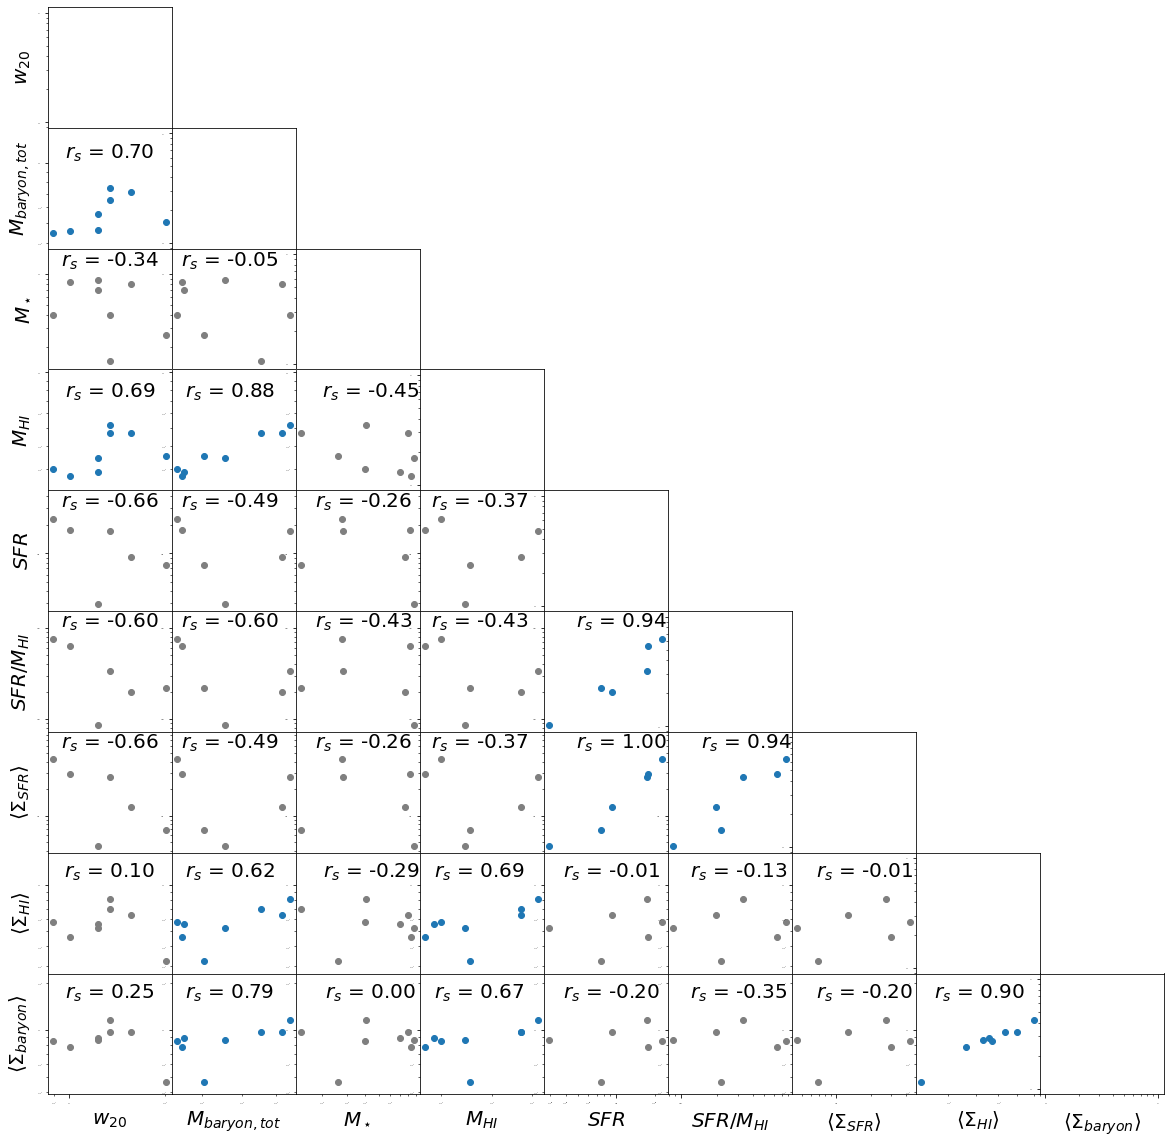

In [29]:
# let's do this with for loops 
useTangos=True

yaxis_t = [df['w20'],                                  # w20
           df['Mbar_t'],                               # Mbar
           df['Mstar_t'],                              # Mstar
           df['Mgas_t']/1.36,                          # MHI
           df['SFR'],                                  # SFR
           df['SFR']/(df['Mgas_t']/1.36),              # SFR/MHI
           df['SFR']/(3.14*(df['Rvir']**2)),           # SigmaSFR
           (df['Mgas_t']/1.36)/(3.14*(df['Rvir']**2)), # SigmaHI
           df['Mbar_t']/(3.14*(df['Rvir']**2))         # SigmaBar
          ]

yaxis_z = [df['w20'],                                  # w20
           df['Mbar_z'],                               # Mbar
           df['Mstar_z'],                              # Mstar
           df['Mgas_z']/1.36,                          # MHI
           df['SFR'],                                  # SFR
           df['SFR']/(df['Mgas_z']/1.36),              # SFR/MHI
           df['SFR']/(3.14*(df['Rvir']**2)),           # SigmaSFR
           (df['Mgas_z']/1.36)/(3.14*(df['Rvir']**2)), # SigmaHI
           df['Mbar_z']/(3.14*(df['Rvir']**2))         # SigmaBar
          ]

# reverse order for xaxis?
xaxis_t = yaxis_t#[::-1]
xaxis_z = yaxis_z#[::-1]

fig, axs = plt.subplots(9,9, facecolor='w', figsize=(20,20), sharex=False, sharey=False)

for i in range(9):
    for j in range(9):
        if j>i:
            axs[i,j].axis('off')
        elif i==j:
            axs[i,j].set_xscale('log')
            axs[i,j].set_yscale('log')
            axs[i,j].tick_params(axis='both', which='major', labelsize=0.001)
            axs[i,j].tick_params(axis='both', which='minor', labelsize=0.001)
        else:
            axs[i,j].set_xscale('log')
            axs[i,j].set_yscale('log')
            axs[i,j].tick_params(axis='both', which='major', labelsize=0.001)
            axs[i,j].tick_params(axis='both', which='minor', labelsize=0.001)
            
            x = xaxis_z[j]
            y = yaxis_z[i]
            if useTangos:
                x = xaxis_t[j]
                y = yaxis_t[i]
                
            x = x[y>0]
            y = y[y>0]
            
            rs = ss.spearmanr(x,y)[0]
            axs[i,j].set_ylim(top=max(y)*2, bottom=min(y)/1.2)
            axs[i,j].text(x=min(x)+(max(x)-min(x))/2.5, y=max(y)*1.5, s=r'$r_s$ = %.2f'%rs, fontsize=20, 
                          zorder=10, horizontalalignment='center', verticalalignment='center')

            c = 'tab:blue'
            if rs < 0.53: c = 'tab:gray'
            axs[i,j].scatter(x,y, c=c)
            
plt.subplots_adjust(wspace=0, hspace=0)

## --- PRETTTIFY --- 
# axis labels 
axs[0,0].set_ylabel(r'$w_{20}$', fontsize=20)
axs[8,0].set_xlabel(r'$w_{20}$', fontsize=20)

axs[1,0].set_ylabel(r'$M_{baryon,tot}$', fontsize=20)
axs[8,1].set_xlabel(r'$M_{baryon,tot}$', fontsize=20)

axs[2,0].set_ylabel(r'$M_\star$', fontsize=20)
axs[8,2].set_xlabel(r'$M_\star$', fontsize=20)

axs[3,0].set_ylabel(r'$M_{HI}$', fontsize=20)
axs[8,3].set_xlabel(r'$M_{HI}$', fontsize=20)

axs[4,0].set_ylabel(r'$SFR$', fontsize=20)
axs[8,4].set_xlabel(r'$SFR$', fontsize=20)

axs[5,0].set_ylabel(r'$SFR / M_{HI}$', fontsize=20)
axs[8,5].set_xlabel(r'$SFR / M_{HI}$', fontsize=20)

axs[6,0].set_ylabel(r'$\langle \Sigma_{SFR} \rangle$', fontsize=20)
axs[8,6].set_xlabel(r'$\langle \Sigma_{SFR} \rangle$', fontsize=20)

axs[7,0].set_ylabel(r'$\langle \Sigma_{HI} \rangle$', fontsize=20)
axs[8,7].set_xlabel(r'$\langle \Sigma_{HI} \rangle$', fontsize=20)

axs[8,0].set_ylabel(r'$\langle \Sigma_{baryon} \rangle$', fontsize=20)
axs[8,8].set_xlabel(r'$\langle \Sigma_{baryon} \rangle$', fontsize=20)

if useTangos:
    plt.savefig('corner_t.png')
else:
    plt.savefig('corner_z.png')

## Mass for zoom and original comparison

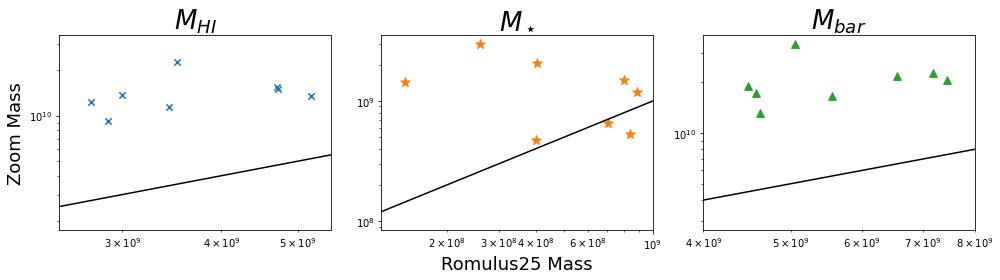

In [75]:
# compare Mbar, Mhi, Mstar
fig, axs = plt.subplots(1,3, facecolor='w', figsize=(14,4))

# Mhi
axs[0].scatter(df['Mgas_t']/1.36, df['Mgas_z']/1.36, s=40, marker='x')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[0].plot([2e9,3e10],[2e9,3e10], c='k')
axs[0].set_xlim([2.5e9,5.5e9])

axs[0].set_title(r'$M_{HI}$', fontsize=26)

axs[1].set_xlabel('Romulus25 Mass', fontsize=18)
axs[0].set_ylabel('Zoom Mass', fontsize=18)

# Mstar
axs[1].scatter(df['Mstar_t'], df['Mstar_z'], s=100, marker='*', c='tab:orange')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

axs[1].plot([1e8,2e9],[1e8,2e9], c='k')
axs[1].set_xlim([1.2e8,1e9])

axs[1].set_title(r'$M_\star$', fontsize=26)

# Mbar
axs[2].scatter(df['Mbar_t'], df['Mbar_z'], s=60, marker='^', c='tab:green')
axs[2].set_xscale('log')
axs[2].set_yscale('log')

axs[2].plot([3e9,9e9], [3e9,9e9], c='k')
axs[2].set_xlim([4e9,8e9])

axs[2].set_title(r'$M_{bar}$', fontsize=26)

plt.tight_layout()

plt.savefig('masscomparison.png')

## Getting Sigma SFR for Each Galaxy

In [7]:
# get SIDM Galaxies
gals = util.getGalaxies()[0]

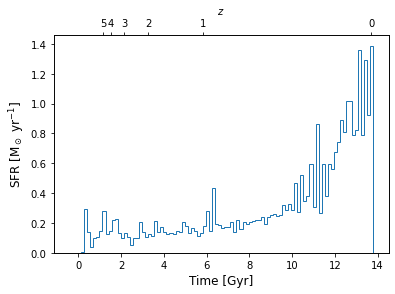

In [62]:
# select galaxy
g = gals[7]

# load file 
fpath = util.getfilepath(g)[0] + '/r'+str(g)+'.romulus25.3072g1HsbBH.004096'
s = pynbody.load(fpath)

s.physical_units()
h = s.halos()[1]

cen_pot_a = pynbody.analysis.halo.center(h, mode='pot', retcen=True)
s['pos'] -= cen_pot_a
h = s.halos()[1]

# get Rvir 
Rvir = pynbody.analysis.halo.virial_radius(s)
# get sfh info
sfhR, sfhTime = pynbody.plot.stars.sfh(s)

In [63]:
Rvir

SimArray(186.82477631, 'kpc')

In [44]:
sfhR

SimArray([6.98401614e-05, 6.98250716e-05, 0.00000000e+00, 0.00000000e+00,
          7.64582705e-03, 2.94288720e-01, 1.39411048e-01, 3.83897325e-02,
          9.81428500e-02, 1.07554555e-01, 1.48351152e-01, 2.77246013e-01,
          1.28338175e-01, 1.47321647e-01, 2.16562910e-01, 2.25215232e-01,
          1.32702963e-01, 9.70324259e-02, 1.30750118e-01, 1.07725863e-01,
          5.31856298e-02, 9.83413956e-02, 1.02342221e-01, 2.07718448e-01,
          1.38999906e-01, 1.05588738e-01, 1.26436614e-01, 1.11245038e-01,
          2.12715969e-01, 1.36385434e-01, 1.70486844e-01, 1.40967712e-01,
          1.28525086e-01, 1.33698728e-01, 1.23465175e-01, 1.44003863e-01,
          1.40742103e-01, 2.05200697e-01, 1.80014534e-01, 1.34884378e-01,
          1.63385789e-01, 1.46106901e-01, 1.10811298e-01, 1.33763270e-01,
          1.76651998e-01, 2.77433395e-01, 1.48501535e-01, 4.35759219e-01,
          1.94562602e-01, 1.88991512e-01, 1.64961151e-01, 1.75841182e-01,
          1.73656068e-01, 2.09799303e-

In [45]:
sfhTime.in_units('Myr')

SimArray([-4.37111532e+02, -2.94741201e+02, -1.52370871e+02,
          -1.00005403e+01,  1.32369790e+02,  2.74740121e+02,
           4.17110451e+02,  5.59480782e+02,  7.01851112e+02,
           8.44221443e+02,  9.86591773e+02,  1.12896210e+03,
           1.27133243e+03,  1.41370276e+03,  1.55607310e+03,
           1.69844343e+03,  1.84081376e+03,  1.98318409e+03,
           2.12555442e+03,  2.26792475e+03,  2.41029508e+03,
           2.55266541e+03,  2.69503574e+03,  2.83740607e+03,
           2.97977640e+03,  3.12214673e+03,  3.26451706e+03,
           3.40688739e+03,  3.54925772e+03,  3.69162805e+03,
           3.83399838e+03,  3.97636871e+03,  4.11873904e+03,
           4.26110938e+03,  4.40347971e+03,  4.54585004e+03,
           4.68822037e+03,  4.83059070e+03,  4.97296103e+03,
           5.11533136e+03,  5.25770169e+03,  5.40007202e+03,
           5.54244235e+03,  5.68481268e+03,  5.82718301e+03,
           5.96955334e+03,  6.11192367e+03,  6.25429400e+03,
           6.39666433e+0

In [46]:
g

615

In [47]:
beg = 4
end = 5
#sum(sfhR[beg:end])/(4*3.14*((Rvir/1000)**2))
#sum(sfhR[beg:end])/(3.14*((Rvir/1000)**2))
sum(sfhR[beg:end])

0.007645827047909164

In [ ]:
sum(sfhR[beg:end]), sum(sfhR[beg:end])/(3.14*((Rvir/1000)**2))

In [60]:
sfhR[0:1]

SimArray([0.0174002], 'Msol yr**-1')

In [41]:
# not sure this is a good method
s.stars['tform'].in_units('Myr')

SimArray([  183.04653256,   190.61801448,   190.61801448, ...,
          13800.76287059, 13800.76287059, 13800.76287059], 'Myr')

## Zoom Masses

In [111]:
# get SIDM Galaxies
gals = util.getGalaxies()[0]

# select galaxy
g = gals[6]

# load file 
fpath = util.getfilepath(g)[0] + '/r'+str(g)+'.romulus25.3072g1HsbBH.004096'
s = pynbody.load(fpath)

s.physical_units()
h = s.halos()[1]

cen_pot_a = pynbody.analysis.halo.center(h, mode='pot', retcen=True)
s['pos'] -= cen_pot_a
h = s.halos()[1]
g

597

In [112]:
"{:e}".format(sum(s.g['mass'])+sum(s.s['mass']))

'1.319043e+10'

In [113]:
"{:e}".format(sum(s.s['mass']))

'6.514049e+08'

In [114]:
"{:e}".format(sum(s.g['mass']))

'1.253903e+10'